# Packages

In [5]:
from openai import OpenAI

In [15]:
def ask_ai(prompt, model_name="gpt-5-mini"):
    # access the openai API and call this model to get a response
    client = OpenAI()
    response = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                 "content": prompt
            }
        ],
        model=model_name
    )
    output = response.choices[0].message.content
    print(output)

    return output

ask_ai('hi')

Hi — how can I help you today?


'Hi — how can I help you today?'

In [17]:
def summarize_all_files(folder):
    # initialize summaries list
    # loop over all files in folder
    # for the txt or md files 
    # summarize them using the openai api like this:
    # ask_ai(prompt,model_name) and it should contain summarize prompt 
    # with contents of file
    # when you're done add it to the list 
    # repeat until done
    pass

output = ask_ai("""
Write up this function for me:
def summarize_all_files(folder):
    # initialize summaries list
    # loop over all files in folder
    # for the txt or md files 
    # summarize them using the openai api like this:
    # ask_ai(prompt,model_name="gpt-5-mini") and it should contain summarize prompt 
    # with contents of file
    # when you're done add it to the list 
    # repeat until done
    pass

Your output should only be this function and nothing else.
"""
      )

def summarize_all_files(folder):
    import os
    summaries = []
    for entry in os.listdir(folder):
        path = os.path.join(folder, entry)
        if not os.path.isfile(path):
            continue
        if not entry.lower().endswith(('.txt', '.md')):
            continue
        try:
            with open(path, 'r', encoding='utf-8', errors='ignore') as f:
                content = f.read()
        except Exception as e:
            summaries.append({'filename': entry, 'error': f'Could not read file: {e}'})
            continue
        prompt = (
            f"You are a helpful assistant. Summarize the following file named '{entry}'. "
            "Provide a concise summary that captures the main points, key details, and any "
            "actions or conclusions. Keep the summary clear and brief (a few short paragraphs "
            "or bullet points). Do not include the original text.\n\n"
            "---BEGIN FILE---\n"
            f"{content}\n"
            "---END FILE---

In [18]:
def summarize_all_files(folder):
    import os
    summaries = []
    for entry in os.listdir(folder):
        path = os.path.join(folder, entry)
        if not os.path.isfile(path):
            continue
        if not entry.lower().endswith(('.txt', '.md')):
            continue
        try:
            with open(path, 'r', encoding='utf-8', errors='ignore') as f:
                content = f.read()
        except Exception as e:
            summaries.append({'filename': entry, 'error': f'Could not read file: {e}'})
            continue
        prompt = (
            f"You are a helpful assistant. Summarize the following file named '{entry}'. "
            "Provide a concise summary that captures the main points, key details, and any "
            "actions or conclusions. Keep the summary clear and brief (a few short paragraphs "
            "or bullet points). Do not include the original text.\n\n"
            "---BEGIN FILE---\n"
            f"{content}\n"
            "---END FILE---"
        )
        try:
            summary = ask_ai(prompt, model_name="gpt-5-mini")
        except Exception as e:
            summaries.append({'filename': entry, 'error': f'API error: {e}'})
            continue
        summaries.append({'filename': entry, 'summary': summary})
    return summaries

summarize_all_files("/Users/greatmaster/Desktop/projects/oreilly-live-trainings/oreilly-python-course")

Summary — Windows Setup Guide (Beginner)

Purpose
- Step-by-step instructions to get the O’Reilly Python course running on Windows (install Python, Git, UV package manager, project dependencies, Playwright browsers, API keys, and Jupyter Lab).

Prerequisites
- Windows 10/11, admin access, internet connection, ~30 minutes. Expect possible antivirus/firewall prompts and occasional PowerShell execution-policy changes.

Core steps (high level)
- Install Python 3.13+: verify with python --version; during install check “Add Python to PATH.”
- Install Git: verify with git --version; default installer settings are fine for most users.
- Install UV: run PowerShell as admin, allow RemoteSigned if needed, then run the UV installer (the guide provides the installer command). Verify with uv --version.
- Clone the course repo: git clone https://github.com/EnkrateiaLucca/oreilly-python-course and cd into it.
- Sync dependencies: run uv sync to create a .venv and install packages (can take several min

[{'filename': 'WINDOWS_SETUP.md',
  'summary': 'Summary — Windows Setup Guide (Beginner)\n\nPurpose\n- Step-by-step instructions to get the O’Reilly Python course running on Windows (install Python, Git, UV package manager, project dependencies, Playwright browsers, API keys, and Jupyter Lab).\n\nPrerequisites\n- Windows 10/11, admin access, internet connection, ~30 minutes. Expect possible antivirus/firewall prompts and occasional PowerShell execution-policy changes.\n\nCore steps (high level)\n- Install Python 3.13+: verify with python --version; during install check “Add Python to PATH.”\n- Install Git: verify with git --version; default installer settings are fine for most users.\n- Install UV: run PowerShell as admin, allow RemoteSigned if needed, then run the UV installer (the guide provides the installer command). Verify with uv --version.\n- Clone the course repo: git clone https://github.com/EnkrateiaLucca/oreilly-python-course and cd into it.\n- Sync dependencies: run uv sync

# Recipe for Creating Automations

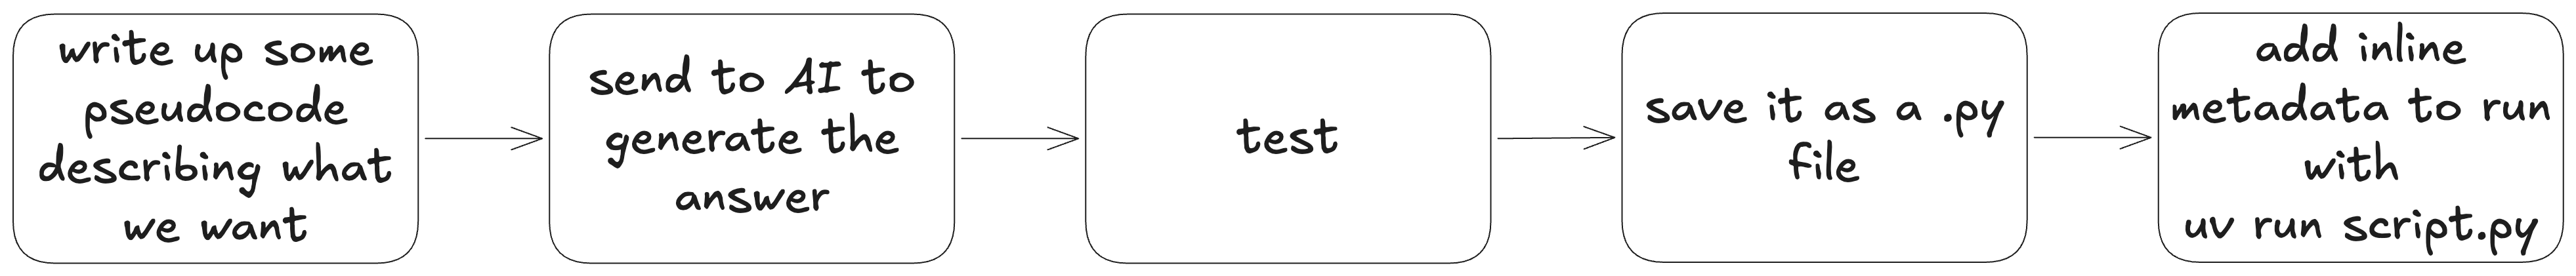

## Let's run an experiment: 

1. Let's imagine a situation we want to solve/automate
2. Let's describe it in steps (as well as we can)
3. Let's send that to our AI
4. Let's take the output
5. Execute and test


In [20]:
output = ask_ai("""
Create this python script replacing the comments with the appropriate code and steps:



def organize_files_in_folder(folder_path):

    # List all files and folders inside a folder

    # Identify the different types of files

    # Use this rule to save files in specific folders:

    # .md, .txt, .pdfs -> documents folder

    # .png, .jpg, .jpeg, ...any other images into a media folder

    # create a third folder for the rest called: others

    # save the files in the right locations

    # return a message saying that succeded



if a comment needs some update you can upudated it at will

output should be just the script
""")

import os
import shutil
from pathlib import Path
import sys

def organize_files_in_folder(folder_path):
    """
    Organize files in the given folder into three subfolders:
    - documents: .md, .txt, .pdf
    - media: .png, .jpg, .jpeg, .gif, .bmp, .tiff, .svg, .webp
    - others: any other file types or files without extension

    Only top-level files in folder_path are moved (subfolders are left intact).
    If a filename conflict occurs in the destination folder, a numeric suffix is added.
    Returns a success message with counts of moved files.
    """
    folder = Path(folder_path)

    if not folder.exists() or not folder.is_dir():
        return f"Error: '{folder_path}' does not exist or is not a directory."

    # Define extension sets
    documents_ext = {'.md', '.txt', '.pdf'}
    media_ext = {'.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.svg', '.webp'}

    # Create destination folders
    documents_dir = folder / "documents"
    media_dir = folder / "media"
    ot

In [21]:
import os
import shutil
from pathlib import Path
import sys

def organize_files_in_folder(folder_path):
    """
    Organize files in the given folder into three subfolders:
    - documents: .md, .txt, .pdf
    - media: .png, .jpg, .jpeg, .gif, .bmp, .tiff, .svg, .webp
    - others: any other file types or files without extension

    Only top-level files in folder_path are moved (subfolders are left intact).
    If a filename conflict occurs in the destination folder, a numeric suffix is added.
    Returns a success message with counts of moved files.
    """
    folder = Path(folder_path)

    if not folder.exists() or not folder.is_dir():
        return f"Error: '{folder_path}' does not exist or is not a directory."

    # Define extension sets
    documents_ext = {'.md', '.txt', '.pdf'}
    media_ext = {'.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff', '.svg', '.webp'}

    # Create destination folders
    documents_dir = folder / "documents"
    media_dir = folder / "media"
    others_dir = folder / "others"

    for d in (documents_dir, media_dir, others_dir):
        d.mkdir(exist_ok=True)

    moved_counts = {"documents": 0, "media": 0, "others": 0}

    for entry in folder.iterdir():
        # Only process files at the top level (skip directories)
        if not entry.is_file():
            continue

        # Skip files that are already inside one of the target folders
        if entry.parent in (documents_dir, media_dir, others_dir):
            continue

        ext = entry.suffix.lower()

        # Decide destination based on extension
        if ext in documents_ext:
            dest_dir = documents_dir
            key = "documents"
        elif ext in media_ext:
            dest_dir = media_dir
            key = "media"
        else:
            dest_dir = others_dir
            key = "others"

        # Resolve name conflicts by adding a suffix before the extension
        dest_path = dest_dir / entry.name
        if dest_path.exists():
            stem = entry.stem
            suffix = entry.suffix
            counter = 1
            while True:
                new_name = f"{stem}({counter}){suffix}"
                dest_path = dest_dir / new_name
                if not dest_path.exists():
                    break
                counter += 1

        # Move the file
        try:
            shutil.move(str(entry), str(dest_path))
            moved_counts[key] += 1
        except Exception as e:
            # If a file couldn't be moved, continue with others
            print(f"Warning: could not move '{entry.name}': {e}")

    return (f"Files organized successfully. Moved {moved_counts['documents']} to 'documents', "
            f"{moved_counts['media']} to 'media', and {moved_counts['others']} to 'others'.")


# # If a folder path is provided as an argument, use it; otherwise use the current directory
# if len(sys.argv) > 1:
#     target_folder = sys.argv[1]
# else:
#     target_folder = os.getcwd()

target_folder = "/Users/greatmaster/Desktop/projects/oreilly-live-trainings/oreilly-python-course/notebooks/assets"
result = organize_files_in_folder(target_folder)
print(result)

Files organized successfully. Moved 15 to 'documents', 47 to 'media', and 17 to 'others'.
